# Objectives:

*Download temperature data from LOBO server using premade function

*transform data into suitable format

*create and apply a "low-pass" filter (i.e. butterworth filter)



# Other relevant information:
* IMPORTANT: Check the previous tutorial

* <a href="http://lobo.satlantic.com">LOBO's main page</a>

* <a href="http://lobo.satlantic.com/loboviz/">"LOBOviz" data download portal</a>

In [1]:
%matplotlib inline

In [37]:
#import lobo function as lb
import lobodobo as lb

In [39]:
# Download data from LOBO
mydata = lb.load_temp('20120610','20120706',plot=False)

In [41]:
print (mydata[:10])

                     temperature [C]
date [AST]                          
2012-06-10 00:00:00            11.32
2012-06-10 01:00:00            11.51
2012-06-10 02:00:00            11.52
2012-06-10 03:00:00            11.44
2012-06-10 04:00:00            11.44
2012-06-10 05:00:00            11.47
2012-06-10 06:00:00            11.67
2012-06-10 07:00:00            12.30
2012-06-10 08:00:00            12.45
2012-06-10 09:00:00            12.58


In [43]:
# Renaming
temp=mydata['temperature [C]']
dates=mydata.index

In [44]:
print (temp[:10])

date [AST]
2012-06-10 00:00:00    11.32
2012-06-10 01:00:00    11.51
2012-06-10 02:00:00    11.52
2012-06-10 03:00:00    11.44
2012-06-10 04:00:00    11.44
2012-06-10 05:00:00    11.47
2012-06-10 06:00:00    11.67
2012-06-10 07:00:00    12.30
2012-06-10 08:00:00    12.45
2012-06-10 09:00:00    12.58
Name: temperature [C], dtype: float64


In [45]:
print (dates[:20])

DatetimeIndex(['2012-06-10 00:00:00', '2012-06-10 01:00:00',
               '2012-06-10 02:00:00', '2012-06-10 03:00:00',
               '2012-06-10 04:00:00', '2012-06-10 05:00:00',
               '2012-06-10 06:00:00', '2012-06-10 07:00:00',
               '2012-06-10 08:00:00', '2012-06-10 09:00:00',
               '2012-06-10 10:00:00', '2012-06-10 11:00:00',
               '2012-06-10 12:00:00', '2012-06-10 13:00:00',
               '2012-06-10 14:00:00', '2012-06-10 15:00:00',
               '2012-06-10 16:00:00', '2012-06-10 17:00:00',
               '2012-06-10 18:00:00', '2012-06-10 19:00:00'],
              dtype='datetime64[ns]', name='date [AST]', freq=None)


# make and apply "low pass" filter

In [55]:
import scipy.signal as signal
import matplotlib.pyplot as plt

#First, design the Buterworth filter
N=2 #Filter order
Wn=0.03 #cutoff frequency
B, A = signal.butter(N, Wn, output='ba')

#Second, apply the filter
temp_filt=signal.filtfilt(B,A,temp)


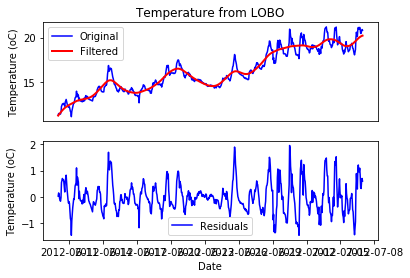

In [56]:
#make plots
fig=plt.figure()
ax1=fig.add_subplot(211)
plt.plot(dates, temp, 'b-')
plt.plot(dates, temp_filt, 'r-', linewidth=2)
plt.ylabel("Temperature (oC)")
plt.legend(['Original', 'Filtered'])
plt.title("Temperature from LOBO")
ax1.axes.get_xaxis().set_visible(False)

ax1=fig.add_subplot(212)
plt.plot(dates, temp-temp_filt, 'b-')
plt.ylabel("Temperature (oC)")
plt.xlabel("Date")
plt.legend(['Residuals'])